In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [42]:

pur_time = pd.Series([36, 44, 73, 32, 44, 29, 63, 60, 55, 74, 61, 26, 76, 40, 39, 28, 69, 61, 54, 58, 47, 41, 70, 51, 58, 36, 71, 47, 74, 59, 50, 78, 59, 48, 67, 53, 67, 52, 38, 55, 53, 53, 43, 77, 44, 63, 63, 54])

**02 Описательная статистика**

<Axes: >

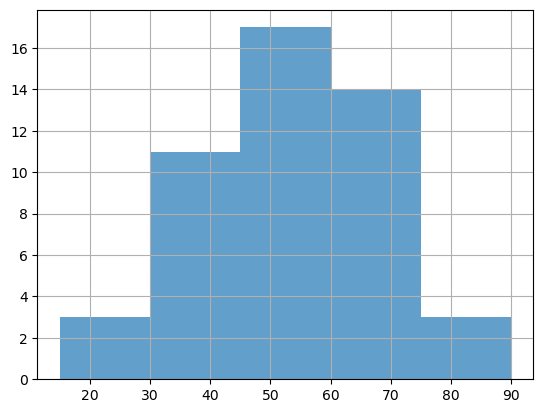

In [43]:
pur_time.hist( bins= [15, 30, 45, 60, 75, 90], alpha=0.7)

**Гистограмма частот для непрерывной переменной**

<Axes: >

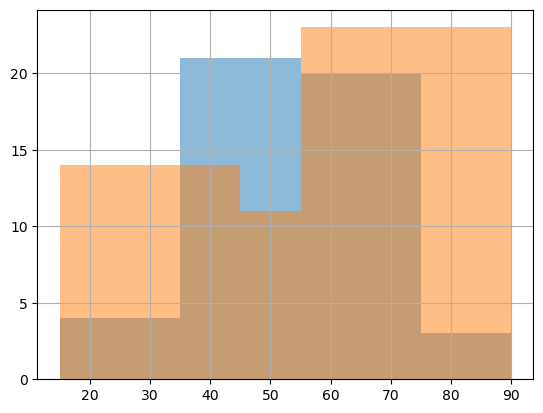

In [44]:
pur_time.hist(bins=[15, 35, 55, 75, 90], alpha=0.5)
pur_time.hist(bins=[15, 45, 55, 90], alpha=0.5)

**Кто разбросал данные?**

In [45]:
data = pd.Series([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
mean_value =np.mean(data)
spacing_all =abs(data-mean_value)  # допишите ваш код здесь: для каждого элемента датасета находим расстояние до среднего значения
spacing_all_mean = np.mean(spacing_all)# допишите ваш код здесь: считаем среднее расстояние
print('--'*20)
print(f'Среднее {mean_value}')
print('--'*20)
print(f'Расстояние до среднего значения\n{spacing_all}')
print('--'*20)
print(f'Cреднее расстояние {spacing_all_mean}')
print('--'*20)

----------------------------------------
Среднее 5.0
----------------------------------------
Расстояние до среднего значения
0     5.0
1     4.0
2     3.0
3     2.0
4     1.0
5     0.0
6     1.0
7     2.0
8     3.0
9     4.0
10    5.0
dtype: float64
----------------------------------------
Cреднее расстояние 2.727272727272727
----------------------------------------


**Стандартное отклонение**


Оцените **дисперсию** генеральной совокупности data = pd.Series([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]).


In [46]:
print(f'Дисперсию генеральной совокупности {np.var(data)}')

Дисперсию генеральной совокупности 10.0


In [47]:
print(np.var(data, ddof=1))

11.0


**Что такое ddof?**
**ddof — это количество "степеней свободы", которые вычитаются из знаменателя при вычислении дисперсии или стандартного отклонения.**

**Простыми словами:**

**ddof=0 → используем n в знаменателе (для генеральной совокупности)**

**ddof=1 → используем n-1 в знаменателе (для выборки из совокупности)**

In [48]:
standard_dev=np.std(data, ddof=1)
print(standard_dev)

3.3166247903554


.
В среднем пользователи разглядывают всплывающие сообщения на сайте 3 секунды. Дисперсия равна 0,25 секунд в квадрате. По правилу трёх сигм рассчитайте, сколько времени нужно показывать сообщение, чтобы его успело разглядеть 99% пользователей.

In [49]:
adv_mean = 3
adv_var = 0.25
adv_std = np.sqrt(adv_var)                                                                        
adv_time = 3+3*adv_std

In [50]:
print('--'*20)
print(adv_std )
print('--'*20)
print(f'Время показа сообщения: {adv_time}')
print('--'*20)


----------------------------------------
0.5
----------------------------------------
Время показа сообщения: 4.5
----------------------------------------


**03 Теория вероятностей**

**Закон больших чисел**

Яндекс отслеживает количество удачных постов определённого блога для Дзена. Абсолютно удачным постом считается такой, у которого число репостов сравнимо с числом лайков. Этот успех считаем за 100%.
Сгенерируйте 20, 400, 10000 случайных целых чисел из отрезка [1, 100]. Это соотношение репостов к лайкам в популяции блогеров в целом. Если для избранного блогера соотношение всегда выше, он причисляется к хорошим.
Для каждого набора чисел вычислите вероятность события «Сгенерированное число лежит в отрезке [21, 40]» (самая типичная доля репостов). Сохраните её в переменных p_20, p_400 и p_10000 соответственно.
Для вычисления вероятности напишите функцию calculate_p которая принимает в качестве параметра количество случайных чисел из отрезка [1, 100], а на выходе передаёт долю тех чисел, которые находятся в отрезке от 21 до 40 включительно.
Выведите полученные вероятности на экран на одной строке.

Подсказка
Внутри цикла for i in range(N) в переменной random_integer сохраните результат работы функции random.randint(1, 100) и запишите следующее условие: если random_integer >= 21 и random_integer <= 40, прибавьте 1 к переменной cnt_21_40.
В блоке return укажите отношение cnt_21_40 к N.
В переменных p_20, p_400 и p_10000 сохраните результаты отработки функции calculate_p() от соответствующего количества экспериментов.
Выведите переменные p_20, p_400 и p_10000 на экран.

In [51]:
import random
random.seed(1111)
def calculate_p(N):
    cnt_21_40 = 0
    for i in range(N):
        random_integer = random.randint(1, 100)
        if random_integer >= 21 and random_integer <= 40:
            cnt_21_40 += 1
    return cnt_21_40 / N

p_20 = calculate_p(20)
p_400 = calculate_p(400)
p_10000 = calculate_p(10000)

print(p_20, p_400, p_10000)

0.15 0.255 0.2003


**Случайные величины, распределение вероятностей и интервалы значений**

In [52]:
spot_matrix = np.array(
    [
        [10, 11, 12, 13, 14, 15],
        [11, 12, 13, 14, 15, 16],
        [12, 13, 14, 15, 16, 17],
        [13, 14, 15, 16, 17, 18],
        [14, 15, 16, 17, 18, 19],
        [15, 16, 17, 18, 19, 20],
    ]
)
spot_counts = {}
for spots1 in range(5, 11):
    for spots2 in range(5, 11):
        S=spots1+spots2
        spot_counts[S]=spot_counts.get(S, 0)+1
total=36
spot_probs = {}
for outcome, count in spot_counts.items():
    spot_probs[outcome]=count/total
for value, count in spot_probs.items():
    print(f'{value}: {count}')

10: 0.027777777777777776
11: 0.05555555555555555
12: 0.08333333333333333
13: 0.1111111111111111
14: 0.1388888888888889
15: 0.16666666666666666
16: 0.1388888888888889
17: 0.1111111111111111
18: 0.08333333333333333
19: 0.05555555555555555
20: 0.027777777777777776


In [53]:
sum_probs_one=0
for value, count in spot_probs.items():
    sum_probs_one+=count
print(int(sum_probs_one))

1


**Математическое ожидание и дисперсия**

In [54]:
x_probs = {
        '3': 0.1,
        '4': 0.2,
        '5' : 0.2,
        '7' : 0.3,
        '11' : 0.1,
        '16' : 0.05,
        '18': 0.05    
}
# E(X): для каждого элемента словаря вычисляем произведение вероятности и значения 
# случайной величины (целочисленное представление ключа словаря):
expectation = sum([int(x_i)*x_probs[x_i] for x_i in x_probs]) 
print(expectation) 

7.0


In [57]:
x_probs_2 = {
    '-4': 0.05,
    '-2': 0.25,
    '0': 0.1,
    '1': 0.1,
    '5': 0.1,
    '7': 0.05,
    '15': 0.35,
}
expectation_2=0
variance=0
of_square=0
square_of=0
for key, value in x_probs_2.items():
    expectation_2+=int(key)*value
    square_of=expectation_2**2
    of_square+=(int(key)**2)*value
    variance=of_square-square_of
    

print('Математическое ожидание равно', expectation_2)
print('Дисперсия равна', variance)

Математическое ожидание равно 5.5
Дисперсия равна 55.349999999999994


In [61]:
# Вероятность того, что отдельно взятый питон окажется одним из 12 знаков Зодиака, равна 1/12.
# Вероятность того, что он принадлежит к одной из 4 стихий, равна 1/4.
# Вероятности для двух стихий - Огня и Земли - нужно сложить, чтобы получить вероятность
# того, что питон весит 3 кг, для остальных просто остается 1/4.
weight_probs = {
        '2': 0.25,
        '3': 0.5,
        '5': 0.25
        }
# далее расчёты по формулам и вывод на экран
expectation_3=0
variance_3=0
of_square_3=0
for key, value in weight_probs.items():
    expectation_3+=int(key)*value
    of_square_3+=((int(key))**2)*value
    variance_3=of_square_3-expectation_3**2
    

print('Математическое ожидание равно', expectation_3)
print('Дисперсия равна', variance_3)

Математическое ожидание равно 3.25
Дисперсия равна 1.1875


**Биномиальное распределение**

In [63]:
from math import factorial
c = factorial(7) / (factorial(3) * factorial(4))
print(c) 

35.0


In [81]:
n_exams = 6 # вставьте ваш код сюда: сколько экзаменов надо сдать?
failure_rate = 0.15  # вставьте ваш код сюда: какова вероятность завалить один экзамен?
distr ={} # вставьте ваш код сюда: создайте переменную, в которой будете хранить значения распределения
arr_coef={}
for k in range(0, n_exams + 1):
    # вставьте ваш код сюда: посчитайте вероятность завалить 
    # 0 экзаменов, 1 экзамен и так далее до 6
    coef=factorial(n_exams)/((factorial(n_exams-k))*factorial(k))
    arr_coef[k]=arr_coef.get(k, coef)
    P=coef*failure_rate**k*(1-failure_rate)**(n_exams-k)
    distr[k]=distr.get(k, P)
print('--'*20)    
print('Биномиальные коэффициенты:')
print('--'*20) 
for i, j in arr_coef.items():
    print(i , j)
print('--'*20)  

print('Распределение вероятностей:')
print('--'*20) 
for i, j in distr.items():
    print(i , j)
print('--'*20)  
    



----------------------------------------
Биномиальные коэффициенты:
----------------------------------------
0 1.0
1 6.0
2 15.0
3 20.0
4 15.0
5 6.0
6 1.0
----------------------------------------
Распределение вероятностей:
----------------------------------------
0 0.37714951562499993
1 0.39933478124999994
2 0.17617710937499995
3 0.04145343749999999
4 0.005486484375
5 0.0003872812499999999
6 1.1390624999999997e-05
----------------------------------------


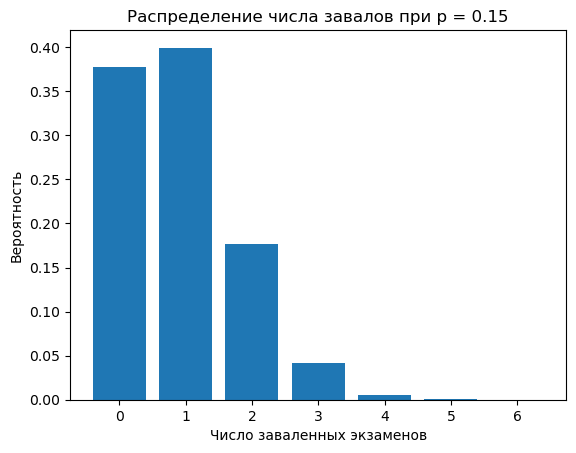

In [82]:
xs = list(distr.keys())      # 0,1,2,3,4,5,6
ys = list(distr.values())    # вероятности

plt.bar(xs, ys)
plt.xlabel('Число заваленных экзаменов')
plt.ylabel('Вероятность')
plt.title('Распределение числа завалов при p = 0.15')
plt.show()

In [93]:
p =0.2   # вставьте ваш код сюда: какова вероятность заключить контракт?
n =30   # вставьте ваш код сюда: со сколькими компаниями начинаем переговоры?
distr_2 ={} # вставьте ваш код сюда: создайте переменную, в которой будете хранить значения распределения
arr={}
for k in range(0, n + 1):
    
    coef = factorial(n) / (factorial(k) * factorial(n - k))
    arr[k]=arr.get(k, coef)
    P = coef * p**k * (1 - p)**(n - k)
    distr_2[k] = distr_2.get(k, P)

print('--'*20)    
print('Биномиальные коэффициенты:')
print('--'*20) 
for i, j in arr.items():
    print(i , j)
print('--'*20) 
print('Распределение вероятностей:')
print('--'*20) 
for i, j in distr_2.items():
    print(i , j)
print('--'*20)  
       
# вставьте ваш код сюда: постройте распределение вероятностей
# вставьте ваш код сюда: постройте гистограмму распределения вероятностей

----------------------------------------
Биномиальные коэффициенты:
----------------------------------------
0 1.0
1 30.0
2 435.0
3 4060.0
4 27405.0
5 142506.0
6 593775.0
7 2035800.0
8 5852925.0
9 14307150.0
10 30045015.0
11 54627300.0
12 86493225.0
13 119759850.0
14 145422675.0
15 155117520.0
16 145422675.0
17 119759850.0
18 86493225.0
19 54627300.0
20 30045015.0
21 14307150.0
22 5852925.0
23 2035800.0
24 593775.0
25 142506.0
26 27405.0
27 4060.0
28 435.0
29 30.0
30 1.0
----------------------------------------
Распределение вероятностей:
----------------------------------------
0 0.0012379400392853823
1 0.009284550294640367
2 0.033656494818071335
3 0.07853182124216646
4 0.13252244834615587
5 0.17227918285000265
6 0.17945748213541945
7 0.15382069897321662
8 0.11055862738699947
9 0.06756360562538856
10 0.035470892953328996
11 0.016123133160604087
12 0.006382073542739118
13 0.0022091793032558483
14 0.0006706437170598111
15 0.000178838324549283
16 4.1915232316238195e-05
17 8.6296066533431

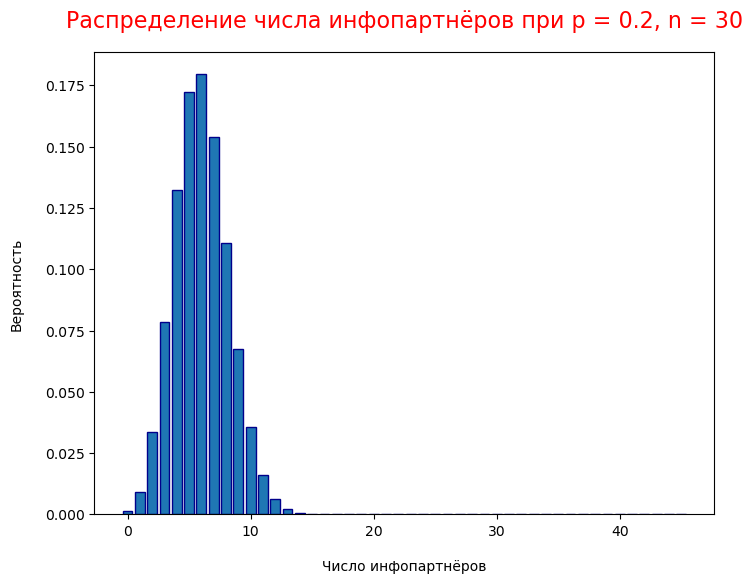

In [130]:
plt.figure(figsize=(8, 6))
plt.bar(x=list(distr_2.keys()), height=list(distr_2.values()), edgecolor='darkblue')
plt.xlabel('Число инфопартнёров', labelpad=15)
plt.ylabel('Вероятность', labelpad=15)
plt.title('Распределение числа инфопартнёров при p = 0.2, n = 30', color='red', pad=18, fontsize=16)
plt.show()

In [114]:
p =0.2   # вставьте ваш код сюда: какова вероятность заключить контракт?
n =45   # вставьте ваш код сюда: со сколькими компаниями начинаем переговоры?
distr_3 ={} # вставьте ваш код сюда: создайте переменную, в которой будете хранить значения распределения
arr={}
for k in range(0, n + 1):
    
    coef = factorial(n) / (factorial(k) * factorial(n - k))
    arr[k]=arr.get(k, coef)
    P = coef * p**k * (1 - p)**(n - k)
    distr_3[k] = distr_3.get(k, P)

print('--'*20) 
print('Распределение вероятностей:')
print('--'*20)  

----------------------------------------
Распределение вероятностей:
----------------------------------------


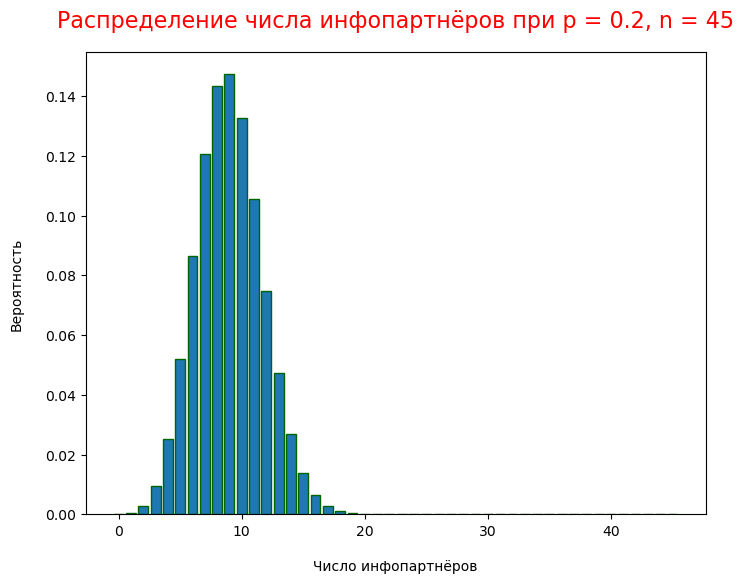

In [132]:
plt.figure(figsize=(8, 6))
plt.bar(x=list(distr_3.keys()), height=list(distr_3.values()), edgecolor='darkgreen')
plt.xlabel('Число инфопартнёров', labelpad=15)
plt.ylabel('Вероятность', labelpad=15)
plt.title('Распределение числа инфопартнёров при p = 0.2, n = 45', color='red', pad=18, fontsize=16)
plt.show()

In [116]:
p =0.2   # вставьте ваш код сюда: какова вероятность заключить контракт?
n =60   # вставьте ваш код сюда: со сколькими компаниями начинаем переговоры?
distr_4 ={} # вставьте ваш код сюда: создайте переменную, в которой будете хранить значения распределения
arr={}
for k in range(0, n + 1):
    
    coef = factorial(n) / (factorial(k) * factorial(n - k))
    arr[k]=arr.get(k, coef)
    P = coef * p**k * (1 - p)**(n - k)
    distr_4[k] = distr_4.get(k, P)

print('--'*20) 
print('Распределение вероятностей:')
print('--'*20)  

----------------------------------------
Распределение вероятностей:
----------------------------------------


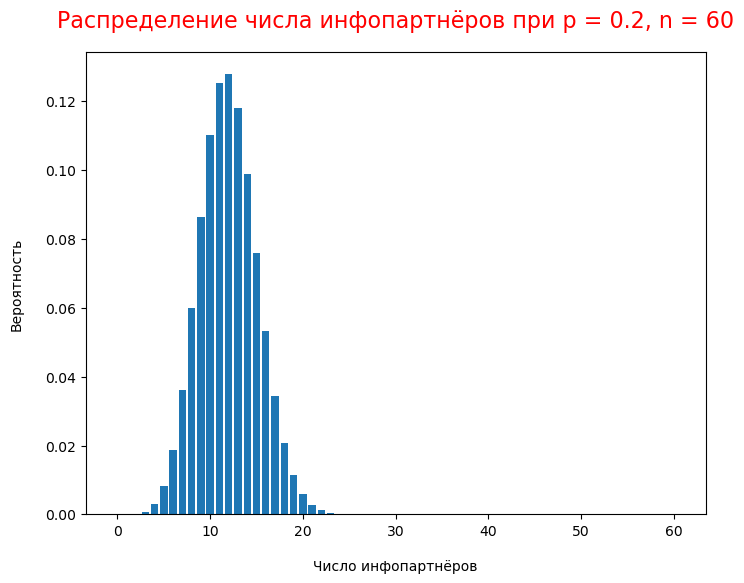

In [124]:
plt.figure(figsize=(8, 6))
plt.bar(x=list(distr_4.keys()), height=list(distr_4.values()))
plt.xlabel('Число инфопартнёров', labelpad=15)
plt.ylabel('Вероятность', labelpad=15)
plt.title('Распределение числа инфопартнёров при p = 0.2, n = 60', color='red', pad=18, fontsize=16)
plt.show()

**Нормальное распределение**

In [133]:
from scipy import stats as st

In [134]:
mu = 100500          # среднее значение
sigma = 3500         # стандартное отклонение
bonus_threshold = 111000   # граница бонуса
penalty_threshold = 92000  # граница штрафа

# P(X > 111000) = 1 - CDF(111000)
p_bonus = 1 - st.norm.cdf(bonus_threshold, loc=mu, scale=sigma)

# P(X < 92000) = CDF(92000)
p_penalty = st.norm.cdf(penalty_threshold, loc=mu, scale=sigma)

print('Вероятность бонуса:', p_bonus)
print('Вероятность штрафа:', p_penalty)

Вероятность бонуса: 0.0013498980316301035
Вероятность штрафа: 0.0075792194387197245


In [141]:
mu = 420
sigma = 65
prob = 0.9  # целевая вероятность распродать весь товар

n_shipment = st.norm.ppf(1 - prob, loc=mu, scale=sigma)
print('Нужно заказать единиц товара:', int(n_shipment))

Нужно заказать единиц товара: 336


In [142]:
mu = 2400                      # средняя стоимость заказа
sigma = 320                    # стандартное отклонение
threshold = 0.75               # доля заказов, которые должны быть дороже 2х доставок

q1 = st.norm.ppf(1 - threshold, loc=mu, scale=sigma)  # первый квартиль (25%)
max_delivery_price = q1 / 2    # половина этой суммы

print('Максимальная стоимость доставки курьером:', max_delivery_price)


Максимальная стоимость доставки курьером: 1092.0816399686269


**Нормальная аппроксимация биномиального распределения**

In [143]:
import math as mt

binom_n = 23000        # целевое количество человек в рассылке
binom_p = 0.4          # доля пользователей, которые открывают рассылку
threshold = 9000       # ожидаемый охват

mu = binom_n * binom_p                           # среднее биномиального: np
sigma = mt.sqrt(binom_n * binom_p * (1 - binom_p))  # σ = sqrt(np(1-p))

# аппроксимация биномиального нормальным:
# P(X >= 9000) ≈ 1 - Ф(8999.5)
p_threshold = 1 - st.norm.cdf(threshold - 0.5, loc=mu, scale=sigma)

print(p_threshold)


0.9965188201893146
